# Linear Regression

## Create dataset

In [1]:
import numpy as np

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

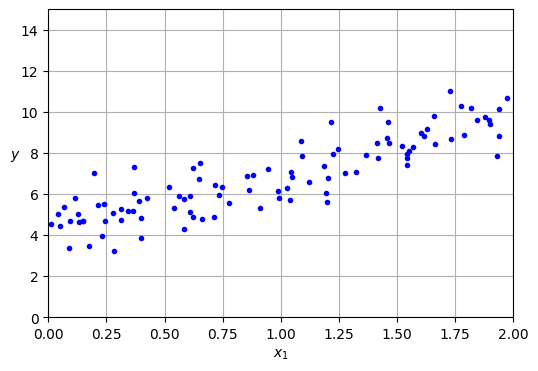

In [2]:
# extra code – generates and saves Figure 4–1

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
#save_fig("generated_data_plot")
plt.show()

## Linear Regression

In [3]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [4]:
X_new = np.array([[0], [2]])

In [5]:
y_predict=lin_reg.predict(X_new)

In [6]:
y_predict

array([[4.21509616],
       [9.75532293]])

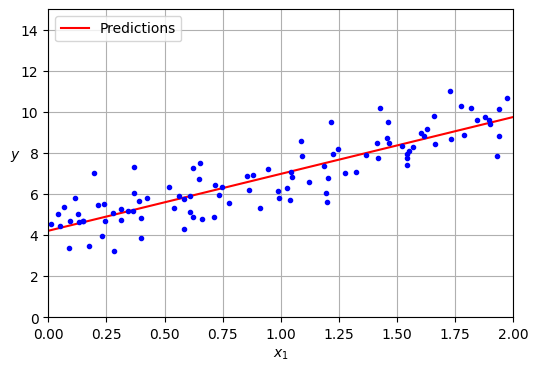

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
#save_fig("linear_model_predictions_plot")

plt.show()

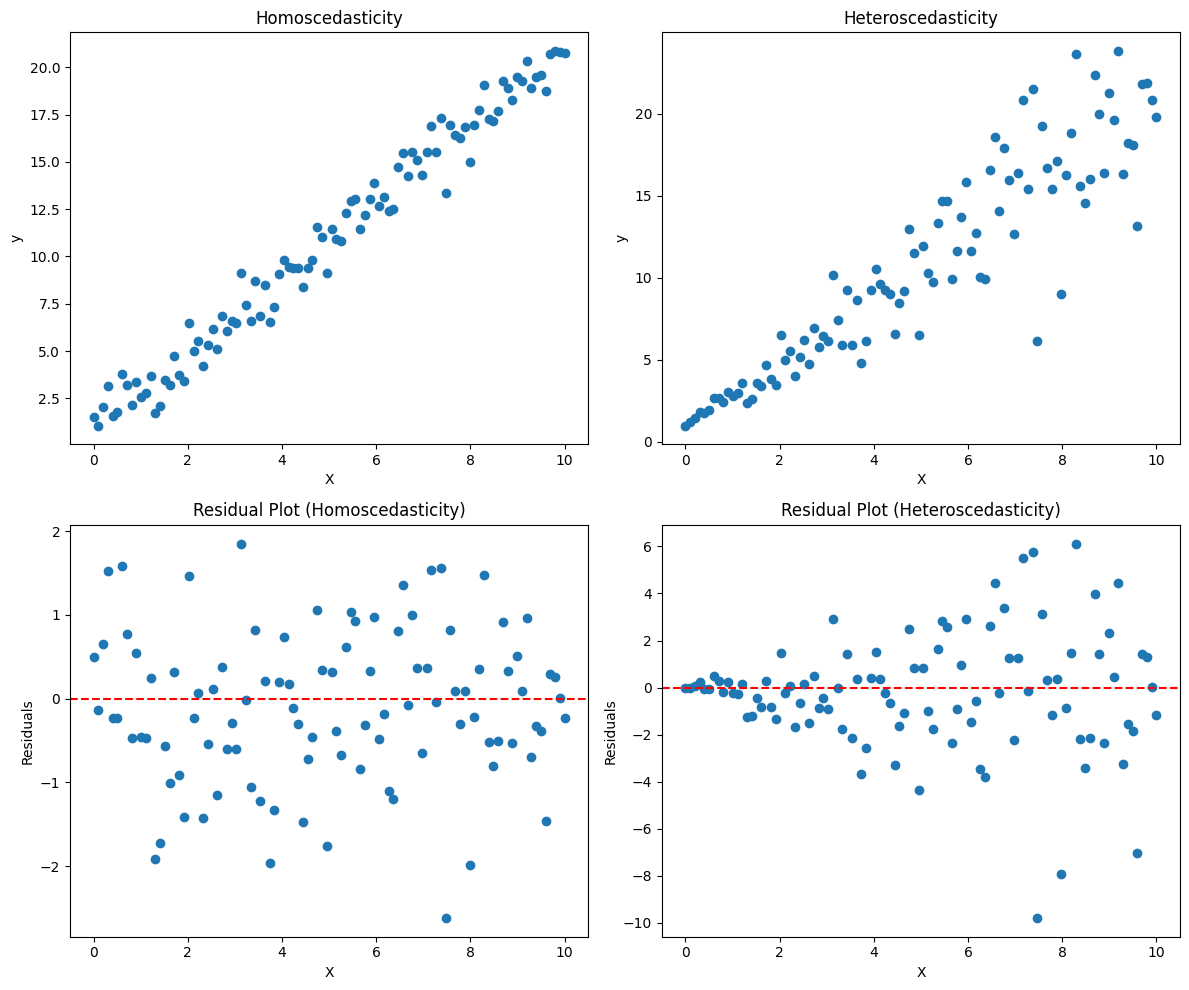

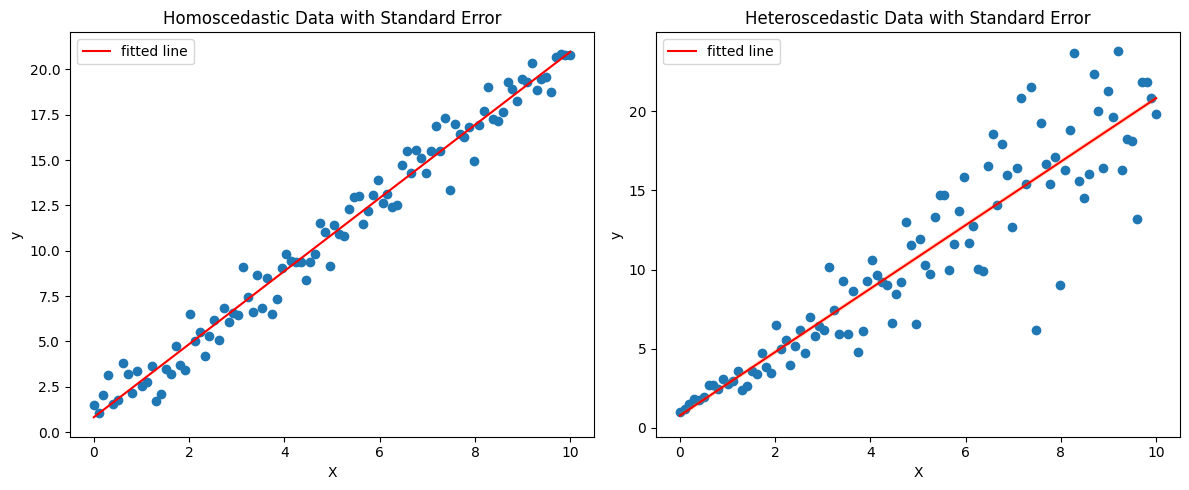

In [8]:
# Demonstrating homoscedasticity and heteroscedasticity

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generate homoscedastic data
np.random.seed(42)
X_homo = np.linspace(0, 10, 100)
y_homo = 2 * X_homo + 1 + np.random.normal(0, 1, 100)

# Generate heteroscedastic data
np.random.seed(42)
X_hetero = np.linspace(0, 10, 100)
y_hetero = 2 * X_hetero + 1 + np.random.normal(0, 0.5 * X_hetero, 100)

# Plot homoscedastic data
plt.figure(figsize=(12, 10))
plt.subplot(221)
plt.scatter(X_homo, y_homo)
plt.title('Homoscedasticity')
plt.xlabel('X')
plt.ylabel('y')

# Plot heteroscedastic data
plt.subplot(222)
plt.scatter(X_hetero, y_hetero)
plt.title('Heteroscedasticity')
plt.xlabel('X')
plt.ylabel('y')

# Residual/errors plots
y_pred_homo = 2 * X_homo + 1
residuals_homo = y_homo - y_pred_homo

y_pred_hetero = 2 * X_hetero + 1
residuals_hetero = y_hetero - y_pred_hetero

plt.subplot(223)
plt.scatter(X_homo, residuals_homo)
plt.title('Residual Plot (Homoscedasticity)')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')

plt.subplot(224)
plt.scatter(X_hetero, residuals_hetero)
plt.title('Residual Plot (Heteroscedasticity)')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')

plt.tight_layout()
plt.show()

# Standard error plots
plt.figure(figsize=(12, 5))

# Homoscedastic standard error
plt.subplot(121)
slope, intercept, r_value, p_value, std_err = stats.linregress(X_homo, y_homo)
plt.scatter(X_homo, y_homo)
plt.plot(X_homo, intercept + slope*X_homo, 'r', label='fitted line')
plt.fill_between(X_homo, 
                 intercept + slope*X_homo - std_err*2,
                 intercept + slope*X_homo + std_err*2, 
                 alpha=0.2)
plt.title('Homoscedastic Data with Standard Error')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Heteroscedastic standard error
plt.subplot(122)
slope, intercept, r_value, p_value, std_err = stats.linregress(X_hetero, y_hetero)
plt.scatter(X_hetero, y_hetero)
plt.plot(X_hetero, intercept + slope*X_hetero, 'r', label='fitted line')
plt.fill_between(X_hetero, 
                 intercept + slope*X_hetero - std_err*2,
                 intercept + slope*X_hetero + std_err*2, 
                 alpha=0.2)
plt.title('Heteroscedastic Data with Standard Error')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()


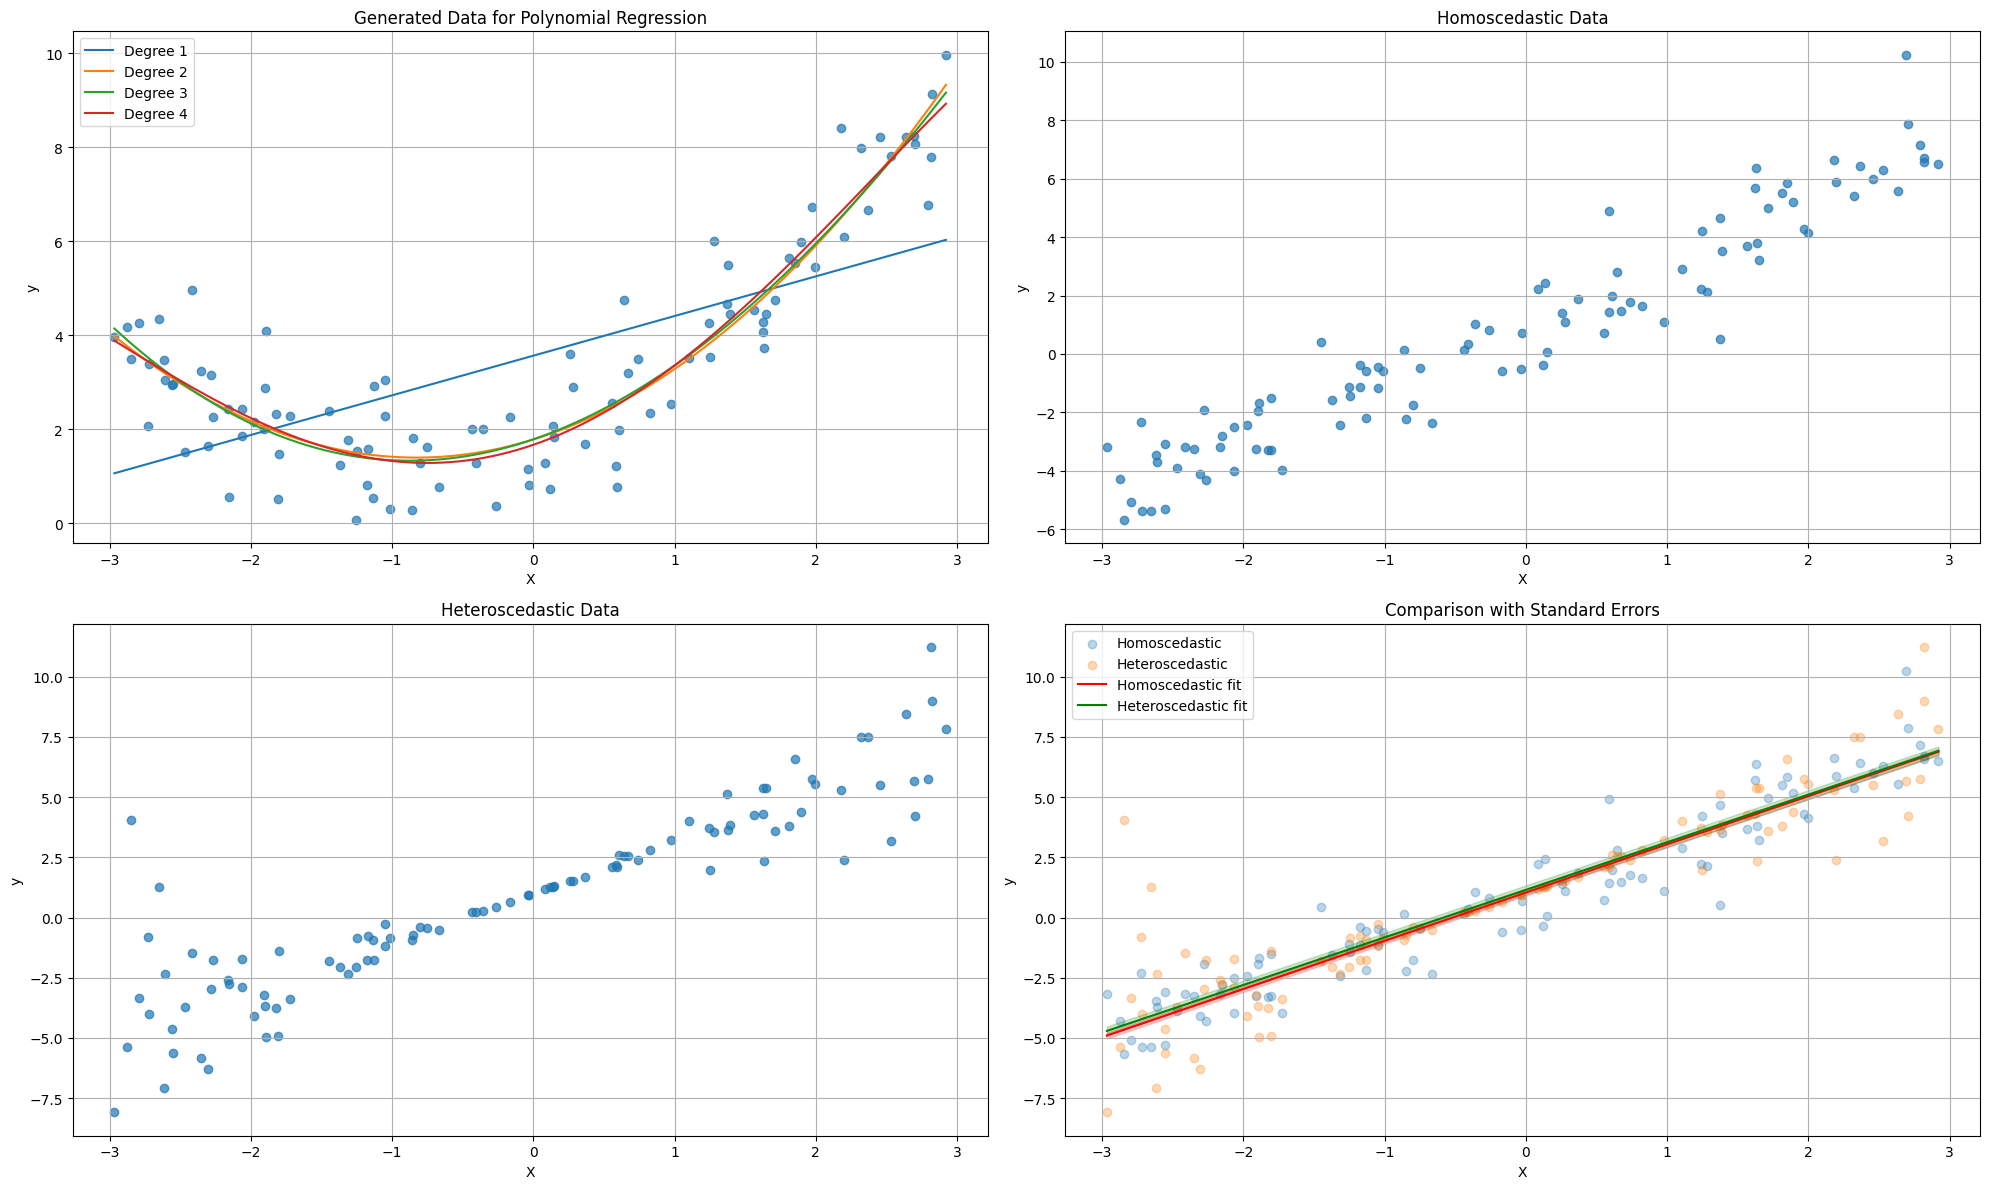

Shape of X: (100, 1)
Shape of y: (100, 1)


In [9]:
# Import necessary libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generate data for polynomial regression
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# Generate homoscedastic and heteroscedastic data
X_homo = X
y_homo = 2 * X + 1 + np.random.randn(m, 1)
X_hetero = X
y_hetero = 2 * X + 1 + np.random.randn(m, 1) * (0.5 * X**2)

plt.figure(figsize=(20, 12))

# Plot for polynomial regression data
plt.subplot(221)
plt.scatter(X, y, alpha=0.7)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Generated Data for Polynomial Regression")
plt.grid(True)

# Add polynomial regression lines
degrees = [1, 2, 3, 4]
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)
    y_pred = lin_reg.predict(poly_features.transform(X_range))
    plt.plot(X_range, y_pred, label=f'Degree {degree}')

plt.legend()

# Plot for homoscedastic data
plt.subplot(222)
plt.scatter(X_homo, y_homo, alpha=0.7)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Homoscedastic Data")
plt.grid(True)

# Plot for heteroscedastic data
plt.subplot(223)
plt.scatter(X_hetero, y_hetero, alpha=0.7)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Heteroscedastic Data")
plt.grid(True)

# Plot standard errors
plt.subplot(224)
slope_homo, intercept_homo, _, _, std_err_homo = stats.linregress(X_homo.flatten(), y_homo.flatten())
slope_hetero, intercept_hetero, _, _, std_err_hetero = stats.linregress(X_hetero.flatten(), y_hetero.flatten())

plt.scatter(X_homo, y_homo, alpha=0.3, label='Homoscedastic')
plt.scatter(X_hetero, y_hetero, alpha=0.3, label='Heteroscedastic')

X_sorted = np.sort(X, axis=0)
plt.plot(X_sorted, intercept_homo + slope_homo * X_sorted, 'r', label='Homoscedastic fit')
plt.plot(X_sorted, intercept_hetero + slope_hetero * X_sorted, 'g', label='Heteroscedastic fit')

plt.fill_between(X_sorted.flatten(), 
                 (intercept_homo + slope_homo * X_sorted - 2 * std_err_homo).flatten(),
                 (intercept_homo + slope_homo * X_sorted + 2 * std_err_homo).flatten(), 
                 alpha=0.2, color='r')
plt.fill_between(X_sorted.flatten(), 
                 (intercept_hetero + slope_hetero * X_sorted - 2 * std_err_hetero).flatten(),
                 (intercept_hetero + slope_hetero * X_sorted + 2 * std_err_hetero).flatten(), 
                 alpha=0.2, color='g')

plt.xlabel("X")
plt.ylabel("y")
plt.title("Comparison with Standard Errors")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


# Gradient Descent


In [10]:
import numpy as np

def batch_gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    m = len(y)
    theta = np.random.randn(X.shape[1], 1)  # Initialize random weights
    cost_history = []
    
    for epoch in range(epochs):
        predictions = X.dot(theta)
        error = predictions - y
        gradients = (2/m) * X.T.dot(error)
        theta -= learning_rate * gradients
        
        # Compute the cost function (Mean Squared Error)
        cost = (1/m) * np.sum(error ** 2)
        cost_history.append(cost)
    
    return theta, cost_history


#### Notes
m = len(y):
What it does: This line calculates the number of samples or data points in the dataset.

Explanation: The variable y is the vector of the target values (the actual output or dependent variable). len(y) gives the number of entries in y, which is the same as the number of rows in X, the input matrix. This is important because many calculations in gradient descent (such as the mean squared error or gradient) involve dividing by the number of samples (m).

Example: If you have 100 data points, m would be 100.

2. theta = np.random.randn(X.shape[1], 1):
What it does: This line initializes the model parameters (weights), theta, to small random values.

Explanation:

X.shape[1] refers to the number of features (or columns) in the input matrix X. For example, if you have two input features (e.g., age and income), X.shape[1] would return 2.
np.random.randn(X.shape[1], 1) generates random numbers from a standard normal distribution with the shape (number of features, 1). The parameters are initialized randomly because this allows gradient descent to start with different values and find the optimal solution by minimizing the cost function.
Example: If your input matrix X has 2 features, theta will be initialized as a 2x1 column vector with random values.

3. cost_history = []:
What it does: This line initializes an empty list to store the cost values at each epoch.

Explanation: The cost function measures how well the model's predictions match the actual data. By storing the cost at each step, we can monitor the progress of the gradient descent algorithm and ensure it is converging to a good solution.

4. for epoch in range(epochs):
What it does: This line starts a loop that will iterate over the number of epochs specified by the user.
Example: If epochs is set to 1000, the loop will run 1000 times, updating the model parameters and cost at each step.


## Batch Gradient Descent

In [11]:
from sklearn.preprocessing import add_dummy_feature

eta = 0.1  # learning rate
n_epochs = 1000
X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
m = len(X_b)  # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients
    #print(epoch, gradients, theta)

The trained model parameters:

In [12]:
theta

array([[3.56401543],
       [0.84362064]])

C:\Users\ryant\AppData\Local\Temp\ipykernel_21436\887846030.py:19: RuntimeWarning: overflow encountered in matmul
  gradients = 2 / m * X_b.T @ (X_b @ theta - y)
C:\Users\ryant\AppData\Local\Temp\ipykernel_21436\887846030.py:19: RuntimeWarning: invalid value encountered in matmul
  gradients = 2 / m * X_b.T @ (X_b @ theta - y)
C:\Users\ryant\AppData\Local\Temp\ipykernel_21436\887846030.py:20: RuntimeWarning: invalid value encountered in subtract
  theta = theta - eta * gradients


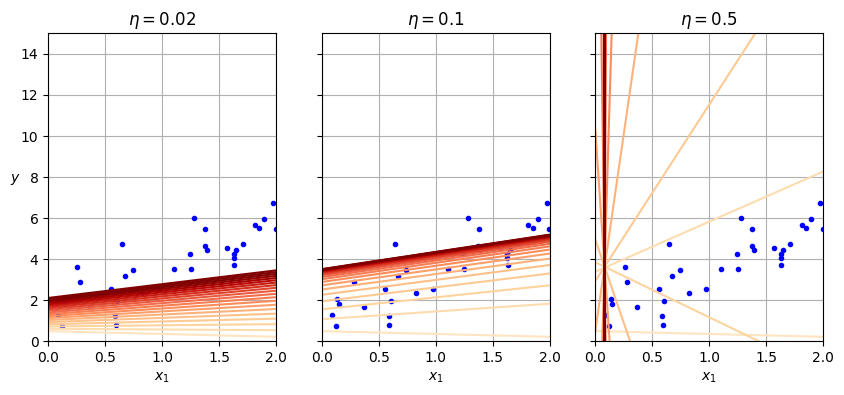

In [13]:
# extra code – generates and saves Figure 4–8

import matplotlib as mpl
import numpy as np

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    X_new = np.linspace(0, 2, 100).reshape(-1, 1)  # Generate new x values
    X_new_b = add_dummy_feature(X_new)  # Add bias term to new x values
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
#save_fig("gradient_descent_plot")
plt.show()

# WEEKLY TASK 
Part 1

Thought Process: 
From reading the first task, it is noted that we are asked to continue the learning process until a good solution is found. So first I think we should have a way to determine when the model gets the lowest/global minimum cost maybe with a loop checking through the run after all iterations/epochs have happened then finds the best model configuration. If none is found then the system, should update the number of epochs/keep updating the number of epochs/should continue running until we get the lowest cost. In the function we should also aim to save the best models maybe in two folders if an iteration happens and then we get a minimum but it's a local minimum or just a minimum but not global minimum then it's saved in a separate folder. and for the global minimum it's saved in a separate folder; that is the configurations.


Great! We’ll go with the following approach:

- **Threshold**: We’ll use a **very small change** (like `1e-6`) in the cost between consecutive epochs as our stopping criterion.
- Additionally, we’ll implement logic to check if the gradient becomes positive after detecting a low cost (which may signal convergence).
- **JSON** format: We’ll save model configurations (parameters and cost) in **JSON files**—one for local minima and one for global minima.

Now let’s proceed step by step:

### Pseudo-code for what we’ll implement:
1. **Initialization**:
   - Start with small epochs (e.g., 100).
   - Initialize model parameters randomly.

2. **Loop** (Adaptive Epochs):
   - Run Batch Gradient Descent.
   - Compute the cost and check the gradient.
   - If the cost stops decreasing or the gradient turns positive after detecting a consistent low cost, stop training.
   - Continue adding epochs until a global minimum is detected.

3. **Save Model**:
   - Save configurations (cost, parameters) in JSON format.
   - Save local minima and global minima in separate files.


### Breakdown of the Code:
1. **Adaptive Epochs**: We start with a small number of epochs (100) and keep increasing it by 50 in each loop until a global minimum is found or convergence is detected.
2. **Saving Models**: 
   - The model configuration (cost, parameters) is saved in **JSON files**.
   - Local minima are saved in one folder (`models/local_min/`), and global minima are saved in another (`models/global_min/`).
3. **Convergence Criteria**:
   - We stop training if the **change in cost** is smaller than the threshold (`1e-6`).
   - If the gradient becomes positive after multiple epochs, the training stops as well, assuming the algorithm is oscillating or stuck.


Part 2
Key Idea:
When the learning rate is too high, the algorithm may overshoot the minimum, causing the cost function to increase rather than decrease consistently. This can lead to oscillations or divergence.

Strategy:
Check for Oscillations: Monitor if the cost function increases significantly from one epoch to the next. If this happens repeatedly, it's a sign that the learning rate may be too high.

Implementation Plan:
Monitor the Cost Function: Keep track of the cost function values over epochs.
Detect Rapid Cost Increase: If the cost increases by more than a certain threshold (e.g., 10% compared to the previous epoch), increment an oscillation counter.
Stop Training Early: If oscillations are detected multiple times (e.g., 3 times), raise a warning and stop the training.





Epoch 1, Cost: 436.6763734524583
Oscillation detected at epoch 2: cost increased by more than 10%
Epoch 2, Cost: 4270.614403456512
Oscillation detected at epoch 3: cost increased by more than 10%
Epoch 3, Cost: 41832.93761056619
Oscillation detected at epoch 4: cost increased by more than 10%
Total epochs run: 4


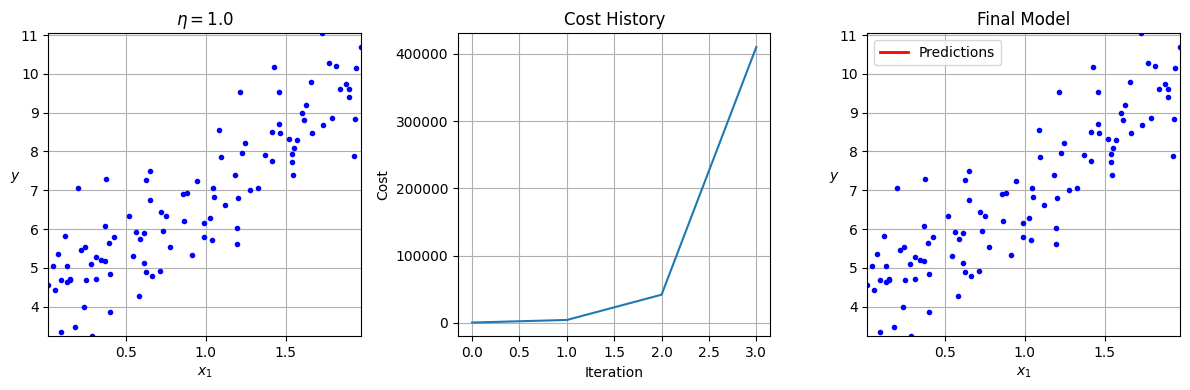

In [32]:
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import add_dummy_feature

def batch_gradient_descent_adaptive(X, y, eta=0.1, initial_epochs=100, threshold=1e-6, max_epochs=10000):
    X_b = add_dummy_feature(X)  # Add x0 = 1 to each instance
    m = len(X_b)  # Number of instances
    
    np.random.seed(42)
    theta = np.random.randn(X_b.shape[1], 1)  # Randomly initialized model parameters
    
    cost_history = []
    theta_path = []
    global_minimum = None
    local_minima = []
    total_epochs = 0
    epochs = initial_epochs
    
    # Variables for detecting high learning rate
    oscillation_count = 0
    max_oscillations = 3  # Number of oscillations before detecting a high learning rate
    prev_cost = float('inf')
    cost_increase_threshold = 0.1  # 10% increase in cost
    
    # Create directories to save models
    os.makedirs('models/global_min', exist_ok=True)
    os.makedirs('models/local_min', exist_ok=True)
    
    while total_epochs < max_epochs:
        converged = False  # Flag to check if convergence occurred in this batch
        for epoch in range(epochs):
            gradients = 2 / m * X_b.T @ (X_b @ theta - y)
            theta = theta - eta * gradients
            theta_path.append(theta.copy())
            
            # Compute the cost function (Mean Squared Error)
            cost = (1 / m) * np.sum((X_b @ theta - y) ** 2)
            cost_history.append(cost)
            
            # Check if cost change is below the threshold
            if abs(prev_cost - cost) < threshold:
                converged = True
                print(f"Converged at epoch {total_epochs + epoch + 1}")
                break  # Stop training as change in cost is too small
            
            # Check for oscillations (cost increasing significantly)
            if cost > prev_cost * (1 + cost_increase_threshold):
                oscillation_count += 1
                print(f"Oscillation detected at epoch {total_epochs + epoch + 1}: cost increased by more than 10%")
                if oscillation_count >= max_oscillations:
                    print(f"Warning: Learning rate {eta} may be too high. Oscillations detected {oscillation_count} times.")
                    converged = True  # Stop training due to oscillations
                    break
            else:
                # Reset oscillation count if cost is decreasing
                oscillation_count = 0

            prev_cost = cost
            
            print(f"Epoch {total_epochs + epoch + 1}, Cost: {cost}")
        
        total_epochs += (epoch + 1)
        
        # Check if we have found a local or global minimum
        if global_minimum is None or cost < global_minimum['cost']:
            global_minimum = {'epoch': total_epochs, 'cost': cost, 'theta': theta.tolist()}
            # Save global minimum model
            with open(f'models/global_min/global_model_epoch_{total_epochs}.json', 'w') as f:
                json.dump(global_minimum, f)
        else:
            # Save local minima when cost improves but is not the lowest seen
            local_minima.append({'epoch': total_epochs, 'cost': cost, 'theta': theta.tolist()})
            with open(f'models/local_min/local_model_epoch_{total_epochs}.json', 'w') as f:
                json.dump(local_minima[-1], f)
        
        if converged:
            break  # Exit the while loop if convergence or oscillations were reached
        
        # Reset prev_cost for the next batch
        prev_cost = float('inf')
    
    print(f"Total epochs run: {total_epochs}")
    return theta, cost_history, theta_path, global_minimum, local_minima

def plot_gradient_descent_adaptive(X, y, eta):
    theta, cost_history, theta_path, global_minimum, local_minima = batch_gradient_descent_adaptive(X, y, eta)
    
    X_b = add_dummy_feature(X)
    plt.figure(figsize=(12, 4))
    
    # Plot 1: Gradient Descent Path
    plt.subplot(131)
    plt.plot(X, y, "b.")
    X_new = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_new_b = add_dummy_feature(X_new)
    n_shown = min(20, len(theta_path))
    for i, theta_i in enumerate(theta_path[:n_shown]):
        y_predict = X_new_b @ theta_i
        color = mpl.colors.rgb2hex(plt.cm.OrRd(i / n_shown + 0.15))
        plt.plot(X_new, y_predict, linestyle="solid", color=color)
    plt.xlabel("$x_1$")
    plt.ylabel("$y$", rotation=0)
    plt.axis([X.min(), X.max(), y.min(), y.max()])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    
    # Plot 2: Cost History
    plt.subplot(132)
    plt.plot(cost_history)
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.title("Cost History")
    plt.grid()
    
    # Plot 3: Final Model
    plt.subplot(133)
    plt.plot(X, y, "b.")
    y_predict = X_new_b @ theta
    plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
    plt.xlabel("$x_1$")
    plt.ylabel("$y$", rotation=0)
    plt.axis([X.min(), X.max(), y.min(), y.max()])
    plt.grid()
    plt.title("Final Model")
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    return theta, global_minimum, local_minima

# Usage
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Appropriate Learning Rate (eta = 0.1)
theta, global_minimum, local_minima = plot_gradient_descent_adaptive(X, y, eta=0.1)

# Testing with High Learning Rate (eta = 1.0)
# theta, global_minimum, local_minima = plot_gradient_descent_adaptive(X, y, eta=1.0)

## Stochastic Gradient Descent

In [15]:
theta_path_sgd = []  # extra code – we need to store the path of theta in the
                     #              parameter space to plot the next figure

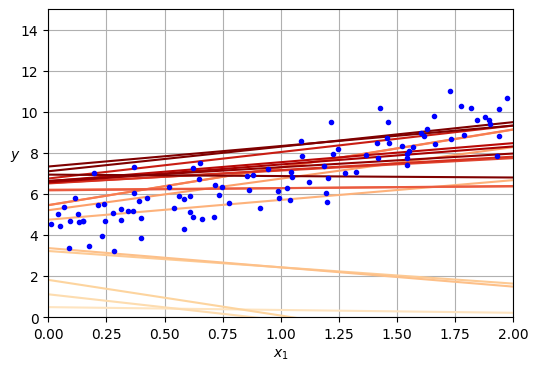

In [16]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

n_shown = 20  # extra code – just needed to generate the figure below
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting

# Define X_new and X_new_b here
X_new = np.linspace(0, 2, 100).reshape(-1, 1)  # Generate new x values
X_new_b = add_dummy_feature(X_new)  # Add bias term to new x values

for epoch in range(n_epochs):
    for iteration in range(m):

        # extra code – these 4 lines are used to generate the figure
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)

        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)  # extra code – to generate the figure

# extra code – this section beautifies and saves Figure 4–10
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
#save_fig("sgd_plot")
plt.show()

In [17]:
theta

array([[6.97506161],
       [0.91276027]])

In [18]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets


SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [19]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

## Mini-batch gradient descent

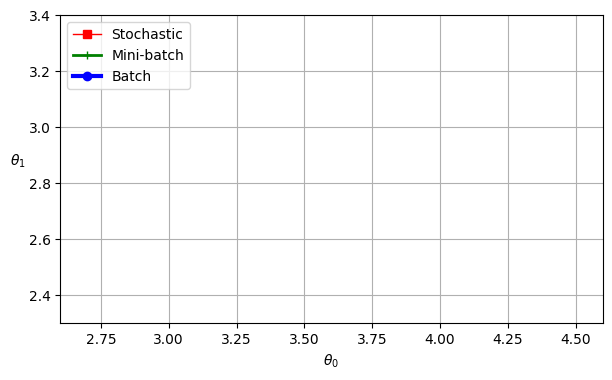

In [20]:
# extra code – this cell generates and saves Figure 4–11

from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

t0, t1 = 200, 1000  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta_path_mgd = []
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
         label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
plt.axis([2.6, 4.6, 2.3, 3.4])
plt.grid()
#save_fig("gradient_descent_paths_plot")
plt.show()

## Mini-batch SGD using SGDRegressor and partial_fit (one step fitting)

In [21]:
import random

minisgd = SGDRegressor(eta0=0.01)

batch_size = 30

for i in range(1000):
    
    idx = random.sample(range(X.shape[0]),batch_size)
    minisgd.partial_fit(X[idx], y.ravel()[idx])
    
minisgd.intercept_, minisgd.coef_

(array([4.20192552]), array([2.76737783]))

# Polynomial Regression

In [22]:
np.random.seed(42)
m2 = 100
X2 = 6 * np.random.rand(m2, 1) - 3
y2 = 0.5 * X2 ** 2 + X2 + 2 + np.random.randn(m2, 1)

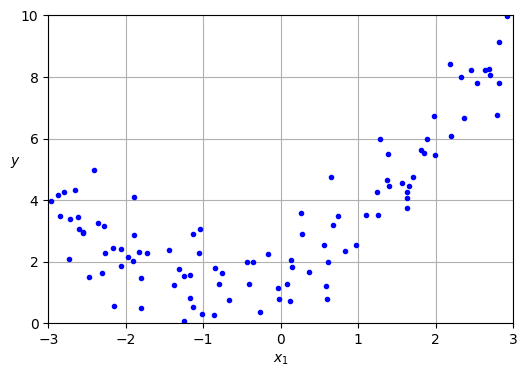

In [23]:
# extra code – this cell generates and saves Figure 4–12
plt.figure(figsize=(6, 4))
plt.plot(X2, y2, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
#save_fig("quadratic_data_plot")
plt.show()

In [24]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X2_poly = poly_features.fit_transform(X2)
X2[0]

array([-0.75275929])

In [25]:
X2_poly[0]

array([-0.75275929,  0.56664654])

In [26]:
lin_reg = LinearRegression()
lin_reg.fit(X2_poly, y2)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

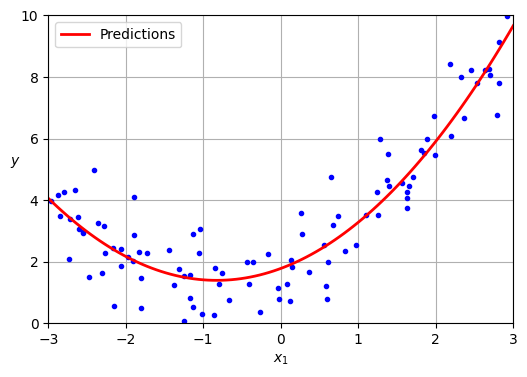

In [27]:
# extra code – this cell generates and saves Figure 4–13

X2_new = np.linspace(-3, 3, 100).reshape(100, 1)
X2_new_poly = poly_features.transform(X2_new)
y2_new = lin_reg.predict(X2_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X2, y2, "b.")
plt.plot(X2_new, y2_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
#save_fig("quadratic_predictions_plot")
plt.show()

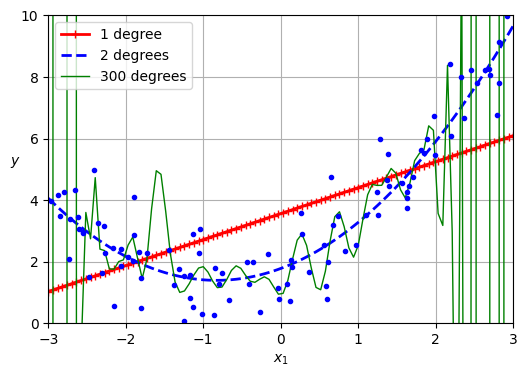

In [28]:
# extra code – this cell generates and saves Figure 4–14

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X2, y2)
    y2_newbig = polynomial_regression.predict(X2_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X2_new, y2_newbig, style, label=label, linewidth=width)

plt.plot(X2, y2, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
#save_fig("high_degree_polynomials_plot")
plt.show()